In [80]:
import pandas as pd

data = pd.read_csv('MLP_regresion.csv')
data.keys()

# Observamos la cabecera del dataset

data.head(5)

# Verificamos si existen celdas vacias
#data.isnull().sum()

,X,Y
0,-10.00000,0.929135
1,-9.97998,0.634406
2,-9.95996,0.946741
3,-9.93994,0.578634
4,-9.91992,0.721276


In [81]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



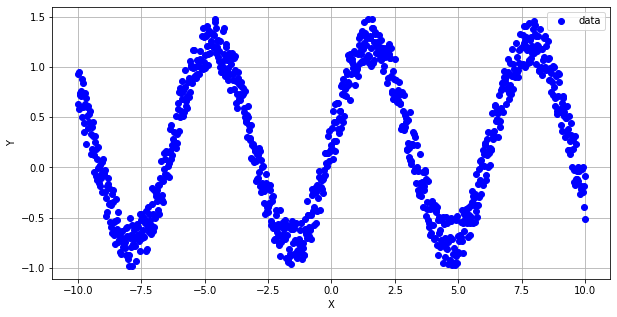

In [82]:
#Visualizando algunos datos
import matplotlib.pyplot as plt
import numpy as np


x=data['X'].values
y=data['Y'].values

fig=plt.figure(figsize=(10,5))
plt.plot(x,y,'o', c='b', label='data')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()
plt.show()



In [132]:
#convertir los np a tensores
X=Variable(torch.from_numpy(x)).float()
X=torch.unsqueeze(X, dim=1)

Y=Variable(torch.from_numpy(y).float())
Y=torch.unsqueeze(Y, dim=1)

In [133]:
import torch
from torch.autograd import Variable #para convertir arrays en tensores

input_dim=1

model = torch.nn.Sequential(
    torch.nn.Linear(input_dim,30),
    torch.nn.Sigmoid(),
    torch.nn.Linear(30,30),
    torch.nn.Linear(30, input_dim)

)

model



Sequential(
  (0): Linear(in_features=1, out_features=30, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=30, out_features=30, bias=True)
  (3): Linear(in_features=30, out_features=1, bias=True)
)

In [134]:
optimizer=torch.optim.SGD(model.parameters(), lr=0.1)
criterion =torch.nn.MSELoss()

Epoch: 1/30001, loss: 0.48505017161369324


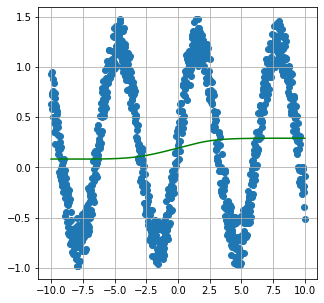

Epoch: 6001/30001, loss: 0.20340198278427124


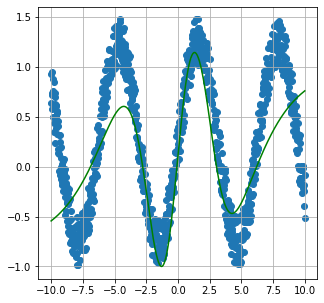

Epoch: 12001/30001, loss: 0.15440674126148224


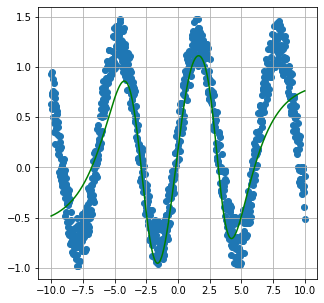

Epoch: 18001/30001, loss: 0.13221965730190277


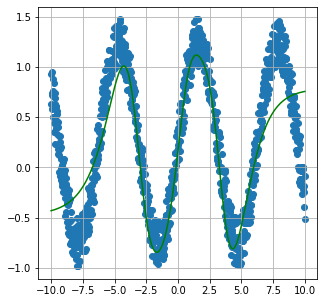

Epoch: 24001/30001, loss: 0.11576473712921143


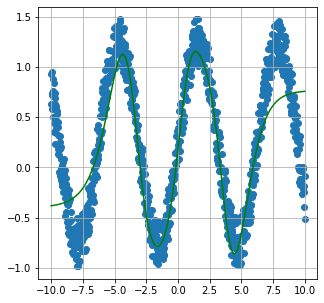

Epoch: 30001/30001, loss: 0.1061936467885971


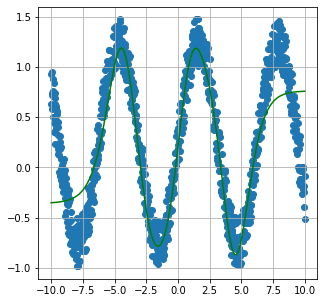

In [135]:
n_epoch=30001

loss_list=[]

for epoch in range(n_epoch):

  Y_pred=model(X)

  loss=criterion(Y_pred,Y)

  loss_list.append(loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if(epoch%((n_epoch-1)/5) == 0):
    print('Epoch: {}/{}, loss: {}'.format(epoch+1, n_epoch, loss.item()))

    fig=plt.figure(figsize=(5,5))
    plt.scatter(X.data.numpy(), Y.data.numpy())
    plt.plot(X.data.numpy(), Y_pred.data.numpy(), 'g-')
    plt.grid()
    plt.show()


In [139]:
#----modelo 2

model_2 = torch.nn.Sequential(
    torch.nn.Linear(input_dim,15),
    torch.nn.Sigmoid(),
    torch.nn.Linear(15,15),
    torch.nn.Linear(15,15),
    torch.nn.Linear(15, input_dim)

)

model_2


Sequential(
  (0): Linear(in_features=1, out_features=15, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=15, out_features=15, bias=True)
  (3): Linear(in_features=15, out_features=15, bias=True)
  (4): Linear(in_features=15, out_features=1, bias=True)
)

In [140]:
optimizer_2=torch.optim.SGD(model_2.parameters(), lr=0.1)
criterion_2 =torch.nn.MSELoss()

Epoch: 1/30001, loss: 0.5123631358146667


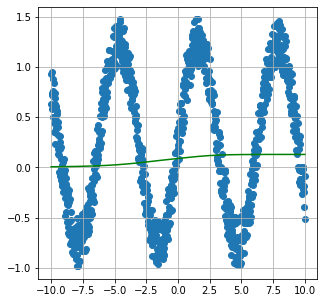

Epoch: 6001/30001, loss: 0.2067410796880722


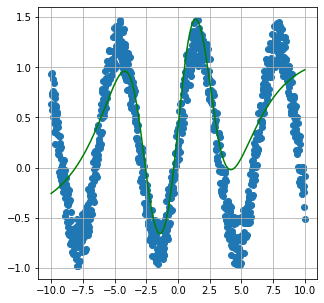

Epoch: 12001/30001, loss: 0.12524737417697906


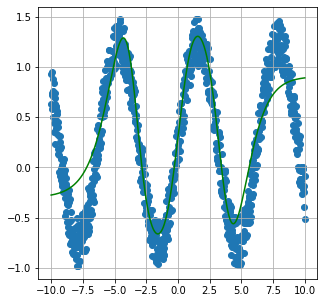

Epoch: 18001/30001, loss: 0.10810410231351852


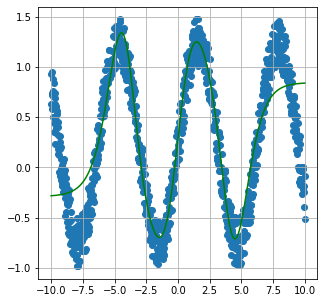

Epoch: 24001/30001, loss: 0.09746482968330383


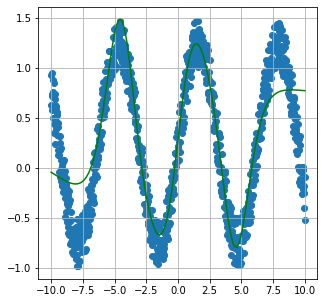

Epoch: 30001/30001, loss: 0.08205893635749817


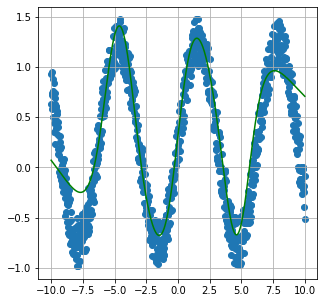

In [141]:
n_epoch=30001

loss_list=[]

for epoch in range(n_epoch):

  Y_pred=model_2(X)

  loss=criterion_2(Y_pred,Y)

  loss_list.append(loss.item())

  optimizer_2.zero_grad()
  loss.backward()
  optimizer_2.step()

  if(epoch%((n_epoch-1)/5) == 0):
    print('Epoch: {}/{}, loss: {}'.format(epoch+1, n_epoch, loss.item()))

    fig=plt.figure(figsize=(5,5))
    plt.scatter(X.data.numpy(), Y.data.numpy())
    plt.plot(X.data.numpy(), Y_pred.data.numpy(), 'g-')
    plt.grid()
    plt.show()

# CONCLUSIONES

Se realizaron dos modelos ( model y model_ 2) con caracteristicas

**Model**: 
- *Funcion de activación*:  Sigmoide.
- *Capas totales*: 3
- *Cantidad de neuronas por capa*: 30
- *Cantidad de epocas*: 30000

**Model_2**: 
- *Funcion de activación*:  Sigmoide.
- *Capas totales*: 4
- *Cantidad de neuronas por capa*: 15
- *Cantidad de epocas*: 30000

Se corrieron ambos modelos con los datos y se obtuvo un mejor resultado con **model_2** pues arrojo un loss final de  *loss_model_2*= 0.08205893635749817 mientras que el otro modelo arrojo uno de *loss_model*=0.1061936467885971.

adicionalmente, el modelo_2 parece converger más rapidamente que el primer modelo.

En conclusion, para un problema con pocas variables parece ser mas conveniente mantener el numero de neuronas por capa en un valor bajo y mas bien aumentar o disminuir la cantidad de capas hasta llegar a un resultado satisfactorio.
